In [1]:
import numpy as np
import torch

seed = 42 #424
np.random.seed(seed)
torch.manual_seed(seed)
#NOTE! This only works for non cudnn. gpu needs
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

from helpers import showcase_code

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# for working with external files, otherwise kernels needs to be restarted each time
%load_ext autoreload
%autoreload 2


# Measures

## NLPD

## Error

## cobeau
 
## coverage ?

## distance from 'optimally informed Tsomething' (DOIT)


# experiment

## setup



### toy problem
parameters were obtained via non-exhaustive gridsearch, since the performance on the error is not the most important metric, the other metrics were not optimized for.

#### 100 times per model:


for i in range experiment:
  seed = f(i)
  model = new_model(seed=f(i))
  model.fit(X_train,y_train)
  outcomes = model.get_uncertainty(X_test,y_test)
  measures.append(get_measures(outcomes))
  
stats = mean/std(measures)
  
#### comparisson models:

##### optimal model

##### mean/std model

### kaggle problem


#### 100 times per model:


for i in range experiment:
  seed = f(i)
  model = new_model(seed=f(i))
  model.fit(X_train,y_train)
  outcomes = model.get_uncertainty(X_test,y_test)
  measures.append(get_measures(outcomes))
  
stats = mean/std(measures)

In [3]:
showcase_code('measures.py',showcase=True)

# Toy Problem

In [4]:
from data_loaders import get_X_y, generate_y
from measures import compute_cobeau, compute_nlpd, compute_error

from helpers import plot_uncertainty

In [5]:
toy = True

num_epochs = 300
if toy:
    num_epochs = 2000

num_experiments = 100


In [6]:
from nn_models.models import SaverModel, BobstrapEnsemble, DropoutModel
from nn_models.base_ensemble import VanillaEnsemble
from nn_models.ensembles import BootstrapEnsemble, ShuffleEnsemble

# Done toy BootstrapEnsemble, BobstrapEnsemble, SaverModel, ShuffleEnsemble, DropoutModel
# todo toy   VanillaEnsemble,

iters = 100
l2 = 1
n_std = 4

In [7]:
from experimentation import Experimentator

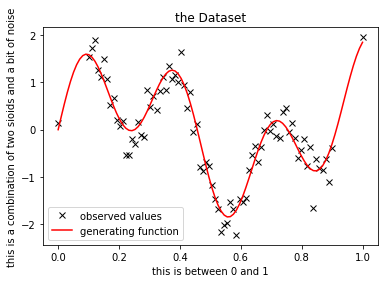

In [8]:
exp = Experimentator(num_experiments,num_epochs,VanillaEnsemble,toy,seed=seed,generator_function = generate_y)

__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'save_path'
__init__() got an unexpected keyword argument 'save_path'
__init__() got

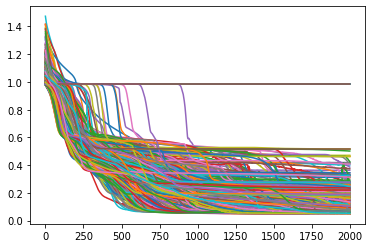

In [9]:
exp.run_experiment()

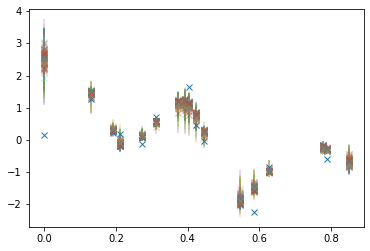

In [10]:
exp.plot_outcomes()

In [11]:
exp.analysis()

0.36933395110355893 0.01625498479405244
0.7326261775005092 0.14848320699478657
0.016288522057435646 0.06340605119895712
-1.4379821325605555 0.2549964851069757


0.36933395110355893 0.01625498479405244
0.7326261775005092 0.14848320699478657
0.016288522057435646 0.06340605119895712
-1.4379821325605555 0.2549964851069757


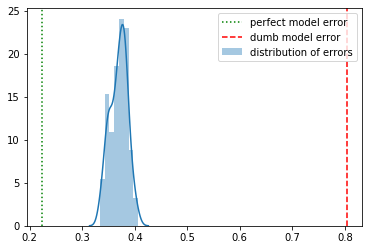

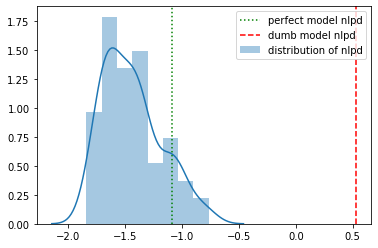

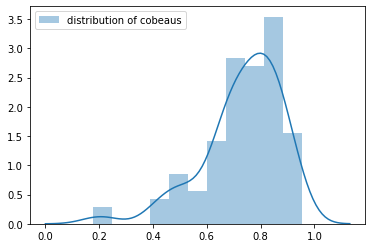

In [12]:
exp.plot_distribution_of_metrics()

32 17
 this many models: (100, 10)
cobeau: (0.6174238568302945, 0.008272240769607557)
nlpd: -1.1244934853310065.
 nlpds of just mean and just std of the model:
0.5377464136941734


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\measures.py:11: RuntimeWarning: invalid value encountered in log
  nlpd = 1/2 * (y-y_pred)**2 / y_std + np.log(y_std)


nan
error: 0.33326756985358624
 this many models: (100, 10)
cobeau: (0.6737190024790566, 0.0030254020940229873)
nlpd: -1.4043212982168203.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.4063875691069982


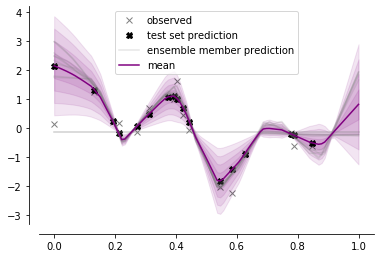

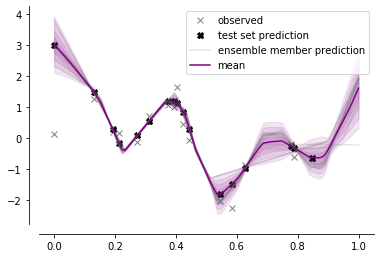

In [13]:
exp.plot_models()

1 2
 this many models: (100, 10)
cobeau: (0.1776457393729723, 0.4951640878910755)
nlpd: -0.763826220186651.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.38468296600291835
 this many models: (100, 10)
cobeau: (0.9542097896707098, 2.901460459283004e-09)
nlpd: -1.8127603525050542.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.376586729139435


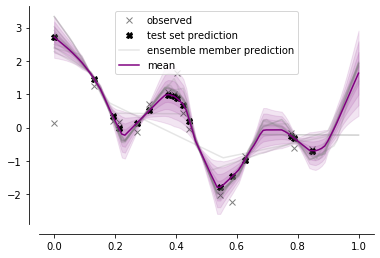

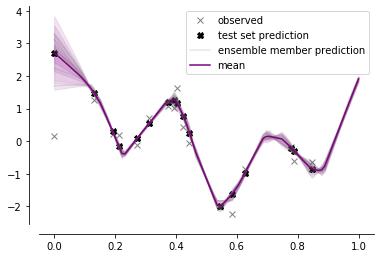

In [14]:
exp.plot_models('cobeau')

4 1
 this many models: (100, 10)
cobeau: (0.8928558691581734, 1.421433028305473e-06)
nlpd: -1.8365501731962262.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.36616212263737885
 this many models: (100, 10)
cobeau: (0.1776457393729723, 0.4951640878910755)
nlpd: -0.763826220186651.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.38468296600291835


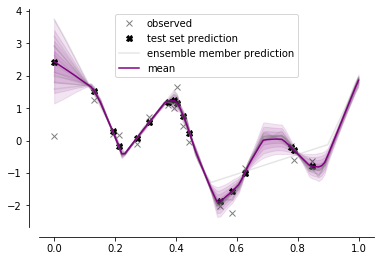

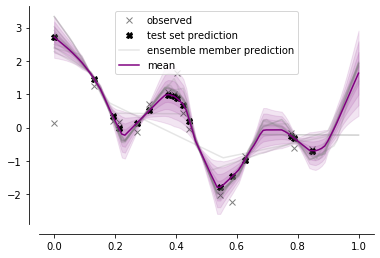

In [15]:
exp.plot_models('nlpd')

In [16]:
exp.stupid_function_error

0.8033239346307726

In [17]:
len(exp.stats_dict['analysis']['cobeau'])

100

In [18]:
len(exp.stats_dict['models'])

100

In [19]:
np.argmin(exp.stats_dict['analysis']['cobeau'])

1

In [20]:
# exp.stats_dict['analysis']['cobeau']

In [21]:
np.argmax([1,2,3])

2

In [22]:
import pickle

save_file = f"pickles\\{exp.model_name}_toy_{toy}_{num_experiments}.pkl"

with open(save_file, "wb") as f:
    pickle.dump(exp, f)

In [23]:
with  open(save_file, "rb") as f:
    exp2 = pickle.load(f)
    

4 1
 this many models: (100, 10)
cobeau: (0.8928558691581734, 1.421433028305473e-06)
nlpd: -1.8365501731962262.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.36616212263737885
 this many models: (100, 10)
cobeau: (0.1776457393729723, 0.4951640878910755)
nlpd: -0.763826220186651.
 nlpds of just mean and just std of the model:
0.5377464136941734
nan
error: 0.38468296600291835


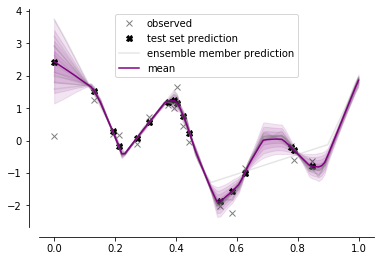

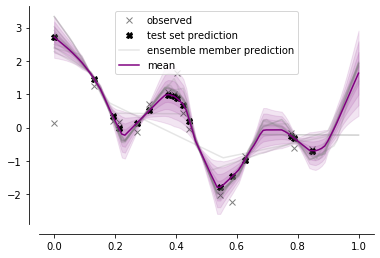

In [24]:
exp2.plot_models('nlpd')

# data analysis



In [25]:
test_string = "<class 'nn_models.models.SaverModel'>"

In [26]:
index_start = test_string.find('.models.')+len('.models.')
index_stop = test_string.find("'>")
new_string = test_string[index_start:index_stop]

In [27]:
new_string = test_string[index_start:index_stop]

In [28]:
new_string

'SaverModel'

In [29]:
type(SaverModel)

type

In [30]:
f'{SaverModel}'

"<class 'nn_models.models.SaverModel'>"